# Constellation Classifier
By Fardin Abdullah, Nicholas Foisy, Japmann Sarin

In [ ]:
import numpy as np 
import pandas as pd  
import os 
from pathlib import Path 
import glob

import seaborn as sns 
import matplotlib.pyplot as plt 

import tensorflow as tf  
from tensorflow.keras import layers
from tensorflow.keras import Model  
from tensorflow.keras.optimizers import RMSprop
from keras_preprocessing.image import ImageDataGenerator


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Defining important variables

In [ ]:
#defining list of labels
input_list = ["Aquarius", "Aries", "Cancer", "Canis Major", "Cassiopeia", "Cygnus", "Leo", "Lyra", "Orion", "Pisces", "Scorpius", "Taurus", "Ursa_Minor", "Virgo"]
input_num = [i for i in range(len(input_list))]

#defining important parameters
pixel_count = 128 # this will be the size we change input images to to feed into the model

#this is where the data for the model will be selected
train_folder_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train')
test_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test')

In [ ]:
#In total, there are samples of images across 9 classes

#we can probably use a loop at some point to do this more concisely

aqu_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Aquarius')
ari_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Aries')
can_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Cancer')
cma_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Canis_Major')
cas_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Cassiopeia')
cyg_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Cygnus')
leo_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Leo')
lyr_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Lyra')
ori_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Orion')
pis_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Pisces')
sco_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Scorpius')
tau_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Taurus')
umi_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Ursa_Minor')
vir_path = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Train/Virgo')


aqu_images = aqu_path.glob('*.jpg')
ari_images = ari_path.glob('*.jpg')
can_images = can_path.glob('*.jpg')
cma_images = cma_path.glob('*.jpg')
cas_images = cas_path.glob('*.jpg')
cyg_images = cyg_path.glob('*.jpg')
pis_images = pis_path.glob('*.jpg')
sco_images = sco_path.glob('*.jpg')
umi_images = umi_path.glob('*.jpg')
tau_images = tau_path.glob('*.jpg')
leo_images = leo_path.glob('*.jpg')
ori_images = ori_path.glob('*.jpg')
vir_images = vir_path.glob('*.jpg')
lyr_images = lyr_path.glob('*.jpg')

images_list_train = [aqu_images, ari_images, can_images, cma_images, cas_images, cyg_images, leo_images, lyr_images, ori_images, pis_images, sco_images, tau_images, umi_images, vir_images]



aqu_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Aquarius')
ari_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Aries')
can_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Cancer')
cma_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Canis_Major')
cas_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Cassiopeia')
cyg_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Cygnus')
leo_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Leo')
lyr_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Lyra')
ori_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Orion')
pis_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Pisces')
sco_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Scorpius')
tau_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Taurus')
umi_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Ursa_Minor')
vir_path_test = Path('/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Test/Virgo')


aqu_images_test = aqu_path_test.glob('*.jpg')
ari_images_test = ari_path_test.glob('*.jpg')
can_images_test = can_path_test.glob('*.jpg')
cma_images_test = cma_path_test.glob('*.jpg')
cas_images_test = cas_path_test.glob('*.jpg')
cyg_images_test = cyg_path_test.glob('*.jpg')
pis_images_test = pis_path_test.glob('*.jpg')
sco_images_test = sco_path_test.glob('*.jpg')
umi_images_test = umi_path_test.glob('*.jpg')
tau_images_test = tau_path_test.glob('*.jpg')
leo_images_test = leo_path_test.glob('*.jpg')
ori_images_test = ori_path_test.glob('*.jpg')
vir_images_test = vir_path_test.glob('*.jpg')
lyr_images_test = lyr_path_test.glob('*.jpg')



#test_csv


def make_csv_with_image_labels(images_list, labels_list):
    df = []
    for i in range(len(images_list)):
      for image in images_list[i]:
        df.append((image, i)) # adding each image of each class in dataframe df with corresponding class label 0, 1, 2, 3, 4
    df = pd.DataFrame(df, columns=["image_path", "label"], index = None) # converting into dataframe 
    df = df.sample(frac = 1).reset_index(drop=True) 
    return df  


images_list_test = [aqu_images_test, ari_images_test, can_images_test, cma_images_test, cas_images_test, cyg_images_test, leo_images_test, lyr_images_test, ori_images_test, pis_images_test, sco_images_test, tau_images_test, umi_images_test, vir_images_test]


test_csv = make_csv_with_image_labels(images_list_test,input_num)

num of Aquarius samples: 100.0
num of Aries samples: 101.0
num of Cancer samples: 151.0
num of Canis Major samples: 111.0
num of Cassiopeia samples: 103.0
num of Cygnus samples: 104.0
num of Leo samples: 82.0
num of Lyra samples: 100.0
num of Orion samples: 112.0
num of Pisces samples: 101.0
num of Scorpius samples: 106.0
num of Taurus samples: 100.0
num of Ursa_Minor samples: 96.0
num of Virgo samples: 89.0
total number of training images: 1456.0


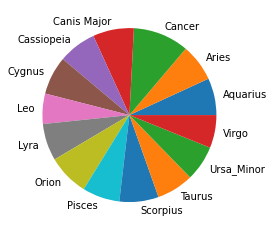

In [ ]:
#pretty visualization of train dataset

train_csv = make_csv_with_image_labels(images_list_train, input_num) #outputs a dataframe with the image path of every image in classes 0 to 4 as well as their class number
train_csv.head()
#train_csv.iloc[0]['image_path'] #example of path stored

lengths = np.empty(len(input_list))
sum_data=0
for num in input_num:
  lengths[num] = len(train_csv["label"][train_csv.label == num]) + len(test_csv["label"][test_csv.label == num])
  sum_data+=lengths[num]
  print("num of", input_list[num], "samples:", lengths[num])

print("total number of training images:", sum_data)
plt.pie(lengths, labels=input_list, shadow=False) 
plt.show()

## Data preprocessing

In [ ]:
X_train = [] #converting images to numpy arrays
for i in train_csv['image_path']:
  img = image.load_img(i, target_size=(400, 400), color_mode='grayscale')
  img = img.resize((pixel_count,pixel_count))
  img = np.asarray(img)
  img = img/255
  X_train.append(img)
X_train = np.array(X_train)

#labels 
y_train = []

for i in train_csv['label']:
  y_train.append(i)

y_train = np.array(y_train)


In [ ]:
#X_test
X_test = []
for i in test_csv['image_path']:
  img = image.load_img(i, target_size=(400, 400), color_mode='grayscale')
  img = img.resize((pixel_count,pixel_count))
  img = np.asarray(img)
  img = img/255
  X_test.append(img)
X_test = np.array(X_test)

#y_test
y_test = []

for i in test_csv['label']:
  y_test.append(i)

y_test = np.array(y_test)




## Building the Convolutional Neural Network

In [ ]:
cnn = Sequential([
                  

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1), padding='valid',strides=(1,1)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='valid',strides=(1,1)),    
    layers.MaxPooling2D((2, 2),padding='valid',strides=None),
    layers.Dropout(0.25),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='valid',strides=(1,1)),    
    layers.MaxPooling2D((2, 2),padding='valid',strides=None),
    layers.Dropout(0.25),

    
    #nick japmann adding 4th layer
    
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid',strides=(1,1)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu',padding='valid',strides=(1,1)),
    layers.MaxPooling2D((2, 2),padding='valid',strides=None),
    layers.Dropout(0.5),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(14, activation='softmax')
  
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
cnn.fit(X_train, y_train, epochs=30)

Epoch 1/30
35/35 [==============================] - 83s 2s/step - loss: 2.6977 - accuracy: 0.0814
Epoch 2/30
35/35 [==============================] - 82s 2s/step - loss: 2.6322 - accuracy: 0.1103
Epoch 3/30
35/35 [==============================] - 82s 2s/step - loss: 2.6343 - accuracy: 0.1139
Epoch 4/30
35/35 [==============================] - 82s 2s/step - loss: 2.6308 - accuracy: 0.1139
Epoch 5/30
35/35 [==============================] - 82s 2s/step - loss: 2.6292 - accuracy: 0.1121
Epoch 6/30
35/35 [==============================] - 82s 2s/step - loss: 2.6263 - accuracy: 0.1130
Epoch 7/30
35/35 [==============================] - 82s 2s/step - loss: 2.6282 - accuracy: 0.1139
Epoch 8/30
35/35 [==============================] - 82s 2s/step - loss: 2.6275 - accuracy: 0.1139
Epoch 9/30
35/35 [==============================] - 83s 2s/step - loss: 2.6279 - accuracy: 0.1139
Epoch 10/30
35/35 [==============================] - 83s 2s/step - loss: 2.5914 - accuracy: 0.1175
Epoch 11/30
35/35 [

In [ ]:
#saving the model
cnn.save('./CNN_cnn.h5')

##Testing the model

In [ ]:
from tensorflow import keras

#y_pred
y_pred = []
outputs = cnn.predict(X_test)

for output in outputs:
  y_pred.append(np.argmax(output))

print("Accuracy of CNN model on testing dataset", accuracy_score(y_test, y_pred))



Accuracy of CNN model on testing dataset 0.9171428571428571


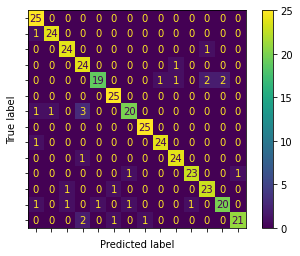

In [ ]:
#confustion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[""])
disp.plot()
plt.show()


In [ ]:
input_list = ["Aquarius", "Aries", "Cancer", "Canis Major", "Cassiopeia", "Cygnus", "Leo", "Lyra", "Orion", "Pisces", "Scorpius", "Taurus", "Ursa_Minor", "Virgo"]
input_list[7]

'Lyra'

## Predicting constellation classes with input images

0
Aquarius


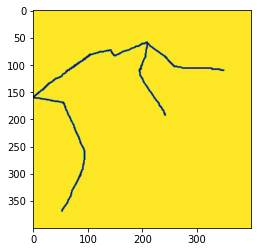

In [ ]:
#Attempting to predict Aquarius constellation

aqu_test = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/aqutest.jpg"
img_aqu = image.load_img(aqu_test, target_size=(400, 400), color_mode='grayscale')

plt.imshow(img_aqu)
img_aqu = img_aqu.resize((pixel_count,pixel_count))
img_aqu= np.asarray(img_aqu)
img_aqu = img_aqu/255
img_aqu = img_aqu.reshape(1,pixel_count,pixel_count,1)
print(np.argmax(cnn.predict(img_aqu))) #0th index is max so it is Aquarius

print(input_list[np.argmax(cnn.predict(img_aqu))])




1
Aries


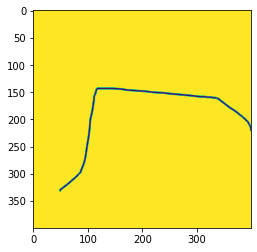

In [ ]:
#Attempting to predict Aries constellation

from tensorflow.keras.preprocessing import image


ari_test = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/ariestest.jpg"
img_ari = image.load_img(ari_test, target_size=(400, 400), color_mode='grayscale')

plt.imshow(img_ari)
img_ari = img_ari.resize((pixel_count,pixel_count))
img_ari= np.asarray(img_ari)
img_ari = img_ari/255
img_ari = img_ari.reshape(1,pixel_count,pixel_count,1)
print(np.argmax(cnn.predict(img_ari))) #0th index is max so it is Aquarius

print(input_list[np.argmax(cnn.predict(img_ari))])

[[7.7151081e-12 2.1078121e-10 9.9978691e-01 4.2008197e-09 4.0846672e-08
  1.0857970e-07 7.1815691e-08 3.2132311e-11 1.1766246e-11 5.8119325e-11
  4.9227296e-11 6.0864259e-08 7.8342289e-08 2.1269127e-04]]
Cancer


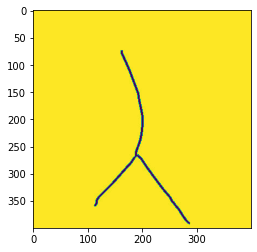

In [ ]:
#Attempting to predict Cancer constellation

can_test = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/cancertest.jpg"
img_can = image.load_img(can_test, target_size=(400, 400), color_mode='grayscale')

plt.imshow(img_can)
img_can = img_can.resize((pixel_count,pixel_count))
img_can= np.asarray(img_can)
img_can = img_can/255
img_can = img_can.reshape(1,pixel_count,pixel_count,1)
print((cnn.predict(img_can))) #0th index is max so it is Aquarius

print(input_list[np.argmax(cnn.predict(img_can))])

[[6.2254723e-05 2.1669444e-05 1.8554099e-05 9.9779701e-01 4.3331779e-06
  5.0875944e-05 3.1337648e-04 3.4128525e-04 1.8469511e-04 8.3056020e-06
  2.5409616e-05 1.4334817e-05 5.9744325e-06 1.1520075e-03]]
Canis Major


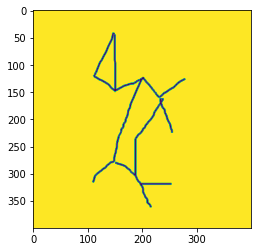

In [ ]:
#Attempting to predict CanisMajor constellation

cass_test = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/canismajortest.jpg"
img_cass = image.load_img(cass_test, target_size=(400, 400), color_mode='grayscale')

plt.imshow(img_cass)
img_cass = img_cass.resize((pixel_count,pixel_count))
img_cass= np.asarray(img_cass)
img_cass = img_cass/255
img_cass = img_cass.reshape(1,pixel_count,pixel_count,1)
print((cnn.predict(img_cass))) #3rh index is max so it is cassiopeia

print(input_list[np.argmax(cnn.predict(img_cass))])

[[7.5584077e-03 8.2762440e-04 6.8040723e-03 3.7819003e-03 7.1096212e-01
  2.8223805e-03 5.9730485e-02 5.0988365e-03 1.0216508e-02 2.3613643e-02
  9.1599621e-05 1.4669111e-01 1.4420652e-02 7.3806415e-03]]
Cassiopeia


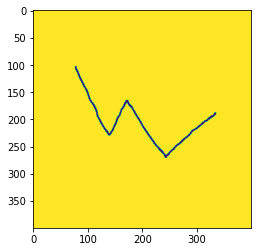

In [ ]:
#Attempting to predict Cassiopeia constellation

cass_test = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/casstest2.jpg"
img_cass = image.load_img(cass_test, target_size=(400, 400), color_mode='grayscale')

plt.imshow(img_cass)
img_cass = img_cass.resize((pixel_count,pixel_count))
img_cass= np.asarray(img_cass)
img_cass = img_cass/255
img_cass = img_cass.reshape(1,pixel_count,pixel_count,1)
print((cnn.predict(img_cass))) #3rh index is max so it is cassiopeia

print(input_list[np.argmax(cnn.predict(img_cass))])

5
Cygnus


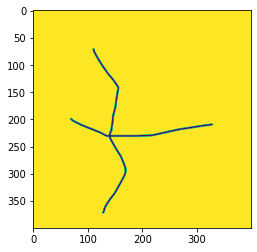

In [ ]:
#Attempting to predict Cygnus constellation

cyg_test = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/cygnustest.jpg"
img_cyg = image.load_img(cyg_test, target_size=(400, 400), color_mode='grayscale')

plt.imshow(img_cyg)
img_cyg = img_cyg.resize((pixel_count,pixel_count))
img_cyg= np.asarray(img_cyg)
img_cyg = img_cyg/255
img_cyg = img_cyg.reshape(1,pixel_count,pixel_count,1)
print(np.argmax(cnn.predict(img_cyg))) #3rh index is max so it is 

print(input_list[np.argmax(cnn.predict(img_cyg))])

[[9.3921508e-06 6.7791370e-05 1.5088602e-06 6.9923262e-04 1.9110059e-05
  7.0003824e-07 9.9809986e-01 2.3416981e-06 1.3249528e-05 7.8141177e-04
  5.4460133e-06 3.8949638e-06 1.9027597e-04 1.0571018e-04]]
Leo


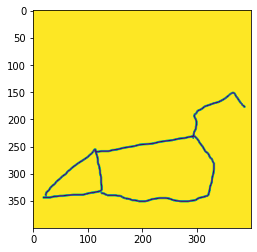

In [ ]:
#Attempting to predict Leo constellation

path = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/leotest.jpg"
image_test = image.load_img(path, target_size=(400, 400), color_mode='grayscale')

plt.imshow(image_test)
image_mod = image_test.resize((pixel_count,pixel_count))
image_mod= np.asarray(image_mod)
image_mod = image_mod/255
image_mod = image_mod.reshape(1,pixel_count,pixel_count,1)
print(cnn.predict(image_mod)) #3rh index is max so it is 

print(input_list[np.argmax(cnn.predict(image_mod))])

[[1.5006174e-08 5.6485716e-10 8.0503391e-09 2.5149805e-07 3.9124913e-08
  1.0719229e-09 2.1079190e-06 9.9999678e-01 7.1367090e-09 1.8529989e-10
  5.5249103e-08 4.1110226e-08 1.0630552e-10 6.7806366e-07]]
Lyra


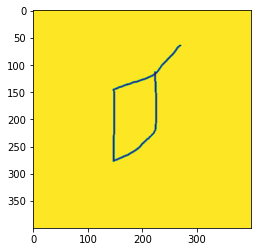

In [ ]:
#Attempting to predict Lyra constellation

path = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/lyratest.jpg"
image_test = image.load_img(path, target_size=(400, 400), color_mode='grayscale')

plt.imshow(image_test)
image_mod = image_test.resize((pixel_count,pixel_count))
image_mod= np.asarray(image_mod)
image_mod = image_mod/255
image_mod = image_mod.reshape(1,pixel_count,pixel_count,1)
print(cnn.predict(image_mod)) #3rh index is max so it is 

print(input_list[np.argmax(cnn.predict(image_mod))])

[[1.38945597e-05 2.47553271e-05 1.32300715e-06 2.48351246e-02
  1.46661157e-04 1.46483342e-06 3.03620443e-04 1.41938415e-07
  1.90324063e-05 9.59137201e-01 1.08236127e-05 3.62136307e-05
  1.54636875e-02 6.11081714e-06]]
Pisces


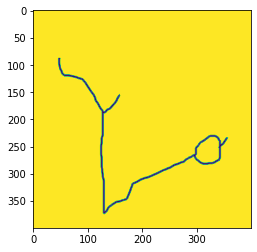

In [ ]:
#Attempting to predict Pisces constellation

pis_test = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/piscestest.jpg"
img_pis = image.load_img(pis_test, target_size=(400, 400), color_mode='grayscale')

plt.imshow(img_pis)
img_pis = img_pis.resize((pixel_count,pixel_count))
img_pis= np.asarray(img_pis)
img_pis = img_pis/255
img_pis = img_pis.reshape(1,pixel_count,pixel_count,1)
print(cnn.predict(img_pis)) #3rh index is max so it is 

print(input_list[np.argmax(cnn.predict(img_pis))])

10
Scorpius


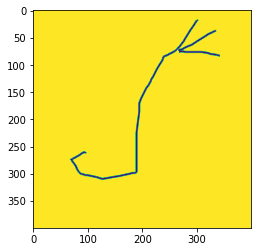

In [ ]:
#Attempting to predict Scorpio constellation

scr_test = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/scortest.jpg"
img_scr = image.load_img(scr_test, target_size=(400, 400), color_mode='grayscale')

plt.imshow(img_scr)
img_scr = img_scr.resize((pixel_count,pixel_count))
img_scr = np.asarray(img_scr)
img_scr = img_scr/255

img_scr = img_scr.reshape(1,pixel_count,pixel_count,1)
print(np.argmax(cnn.predict(img_scr))) #4th index is max so it is a scorpio
print(input_list[np.argmax(cnn.predict(img_scr))])

11
Taurus


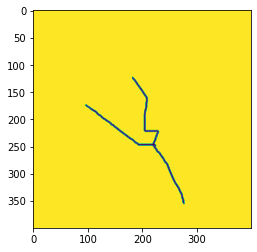

In [ ]:
#Attempting to predict Taurus constellation

tau_test = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/taurustest.jpg"
img_tau = image.load_img(tau_test, target_size=(400, 400), color_mode='grayscale')

plt.imshow(img_tau)
img_tau = img_tau.resize((pixel_count,pixel_count))
img_tau= np.asarray(img_tau)
img_tau = img_tau/255
img_tau = img_tau.reshape(1,pixel_count,pixel_count,1)
print(np.argmax(cnn.predict(img_tau))) #3rh index is max so it is 

print(input_list[np.argmax(cnn.predict(img_tau))])

6
Leo


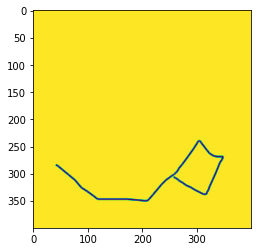

In [ ]:
umi_test = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/ursaminortest.jpg"
img_umi = image.load_img(umi_test, target_size=(400, 400), color_mode='grayscale')

plt.imshow(img_umi)
img_umi = img_umi.resize((pixel_count,pixel_count))
img_umi= np.asarray(img_umi)
img_umi = img_umi/255
img_umi = img_umi.reshape(1,pixel_count,pixel_count,1)

print(np.argmax(cnn.predict(img_umi))) #3rh index is max so it is 

print(input_list[np.argmax(cnn.predict(img_umi))])

13
Virgo


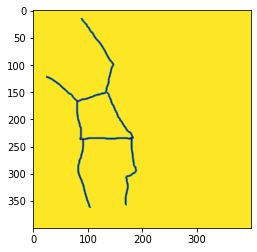

In [ ]:
umi_test = "/content/gdrive/MyDrive/ConstellationClassifier/Dataset/Model_Data/Predict/virgotest.jpg"
img_umi = image.load_img(umi_test, target_size=(400, 400), color_mode='grayscale')

plt.imshow(img_umi)
img_umi = img_umi.resize((pixel_count,pixel_count))
img_umi= np.asarray(img_umi)
img_umi = img_umi/255
img_umi = img_umi.reshape(1,pixel_count,pixel_count,1)

print(np.argmax(cnn.predict(img_umi))) #3rh index is max so it is 

print(input_list[np.argmax(cnn.predict(img_umi))])

In [ ]:
from tensorflow import keras
model = keras.models.load_model('./CNN_cnn.h5')

print(cnn.predict(img_umi)) #3rh index is max so it is 

print(input_list[np.argmax(cnn.predict(img_umi))])

##Conclusion

Overall, our model works pretty well :)

If you would like to contribute to our dataset, go to https://foisy.co/ to draw images!